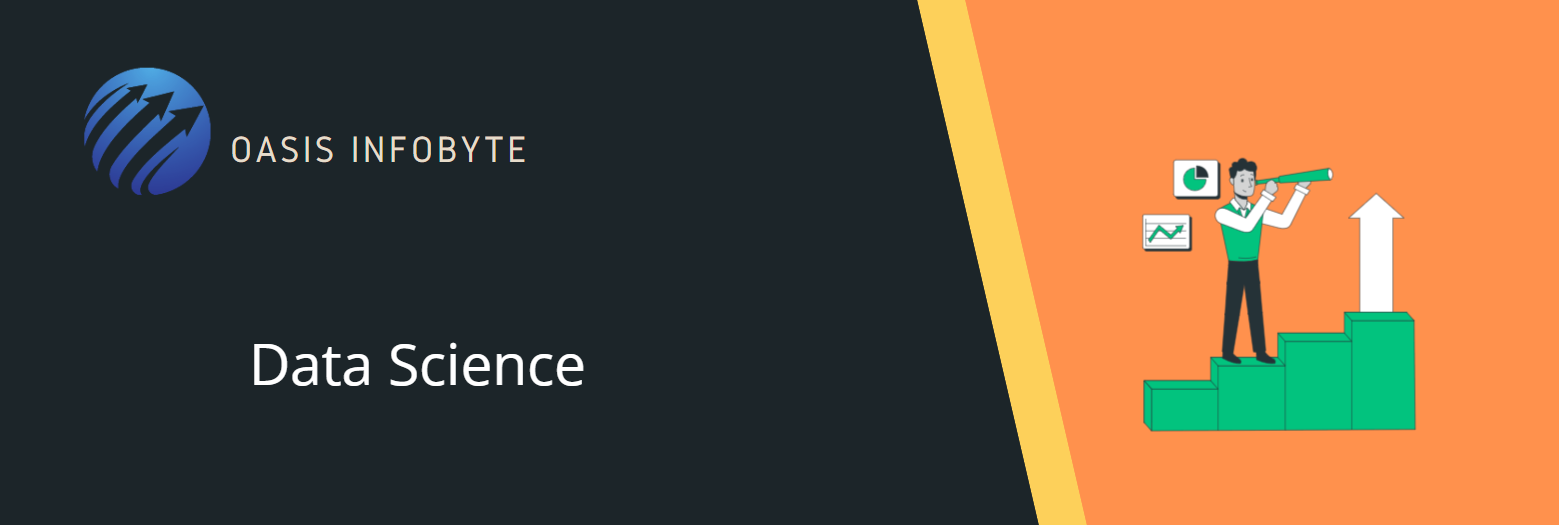

# Task 1 = Iris Flowers Classification ML

Intern : Deepak Prajapat

In [1]:
from sklearn import datasets

In [2]:
# import necessary libarary
import numpy as np
import pandas as pd
import seaborn as sns

### Load Dataset

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data  # feature matrix
y = iris.target  # target vector

In [5]:
iris2 = pd.read_csv('iris.csv')
iris2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print(iris2.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [7]:
iris2.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
iris2.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris2.drop(["Id"],axis=1,inplace=True)
iris2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

print(X,y)

In [11]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size =0.2)

In [14]:
print(X_train.shape,X_test.shape)

(120, 4) (30, 4)


### Nearest Neighbour Classification

In [15]:
from sklearn import neighbors, metrics
from sklearn.preprocessing import LabelEncoder

In [16]:
Le = LabelEncoder()
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights = 'uniform')

In [17]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size =0.2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [18]:
pred = knn.predict(X_test)

#### Accuracy

In [19]:
accuracy = metrics.accuracy_score(y_test, pred)
print("prediction", pred)
print("accuracy", accuracy)

prediction [1 1 0 0 2 0 0 1 2 2 0 1 0 2 1 1 1 1 0 0 2 0 1 1 0 0 2 2 1 1]
accuracy 0.9666666666666667


### Support Vector Mchine (SVM)

In [20]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [21]:
model = svm.SVC()
model.fit(X_train,y_train)
print(model)
print(X_train.shape,y_train.shape)


SVC()
(120, 4) (120,)


In [22]:
pred2 = model.predict(X_test)
acc = accuracy_score(y_test,pred2)

In [23]:
print("prediction", pred2)
print("actual    ", y_test)
print("accuracy  ", acc)

prediction [1 2 0 0 2 0 0 1 2 2 0 1 0 2 2 1 1 1 0 0 2 0 1 1 0 0 2 2 1 1]
actual     [1 1 0 0 2 0 0 1 2 2 0 1 0 2 2 1 1 1 0 0 2 0 1 1 0 0 2 2 1 1]
accuracy   0.9666666666666667


### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [25]:
mod = LinearRegression()
mod.fit(X,y)
yhat =mod.predict(X)


Text(0, 0.5, 'sepal width')

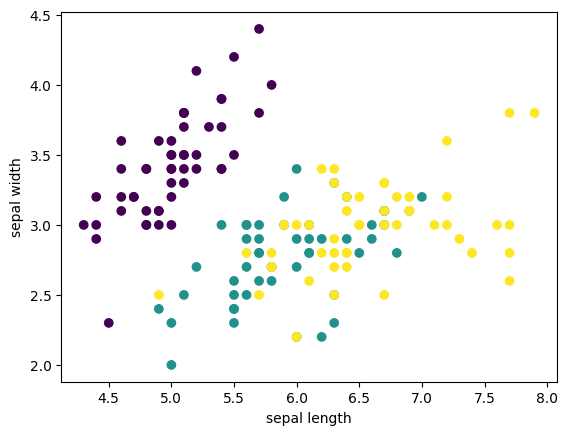

In [26]:
plt.scatter(X[:, 0],X[:, 1], c=y)
plt.xlabel('sepal length')
plt.ylabel('sepal width')


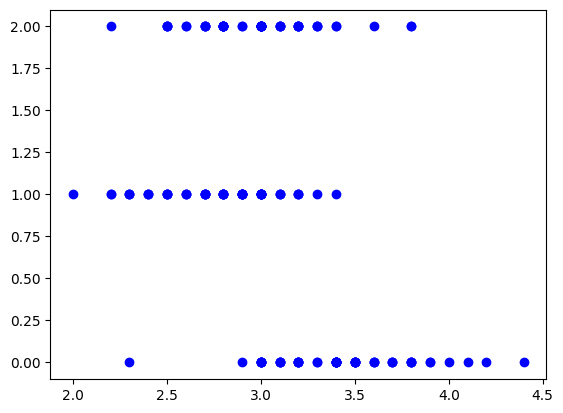

In [56]:
lr = LinearRegression()
plt.scatter(X[:,1],y,c='b')
plt.show()

In [28]:
model=lr.fit(X_train,y_train)
pred3 = model.predict(X_test)
print("Prediction",pred3)
print("R^2 value ",lr.score(X,y))
print("coeff     ",lr.coef_)
print("Intercept ",lr.intercept_)

Prediction [ 1.13173733  1.61603872 -0.04623043 -0.01148944  2.02613007 -0.14598252
 -0.0501558   1.41404866  1.90795286  1.70041308 -0.12407055  1.20079329
  0.02699338  1.90695236  1.58042494  1.24033072  1.19231869  1.29014291
  0.0228208  -0.07599617  2.10706914 -0.11017868  1.35738794  1.28982559
 -0.04386877  0.05245881  1.6175977   2.01161434  1.29225735  0.87051931]
R^2 value  0.9299711726386757
coeff      [-0.14694547 -0.02117467  0.26713143  0.56723068]
Intercept  0.24752983495642455


### K Means

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


In [30]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size =6)

model2= KMeans(n_clusters=2, random_state=0)
model2.fit(X_train)

C:\Users\deepak parajapt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [31]:
pred4 = model2.predict(X_test)
labels= model2.labels_
print("prediction", pred4)
print("labels    ", labels)
print("accuracy  ", accuracy_score)

prediction [0 0 1 0 1 1]
labels     [0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0]
accuracy   <function accuracy_score at 0x0000025D2AEC7E20>


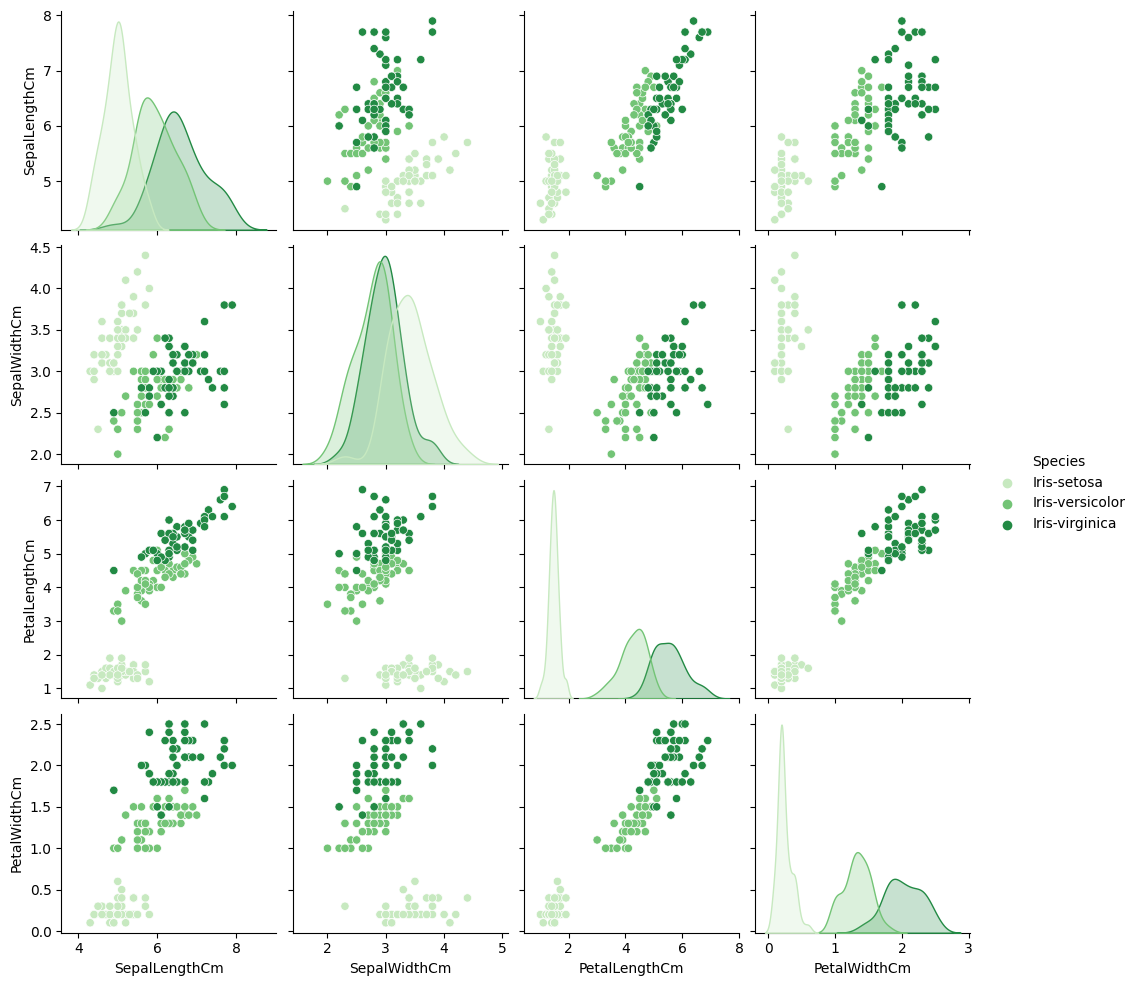

In [51]:
sns.pairplot(kind ='scatter', data=iris2,hue='Species', palette='Greens' )

### Logistic Regression

C:\Users\deepak parajapt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


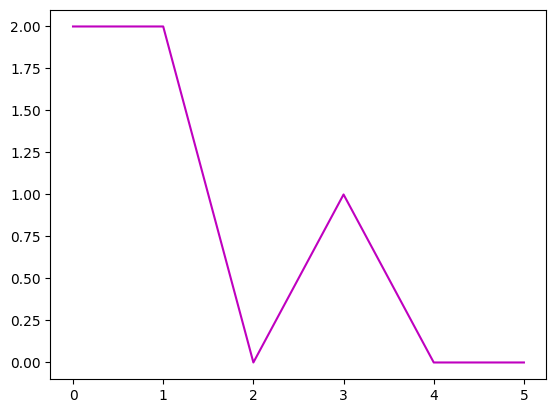

In [59]:
from sklearn.linear_model import LogisticRegression

model3= LogisticRegression()
model3.fit(X,y).predict(X).sum()
yhat2 = model3.predict(X_test)
plt.plot(yhat2, c="m")
plt.show()

##### Task 1 Submitted by Deepak Prajapat